In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display
%matplotlib inline

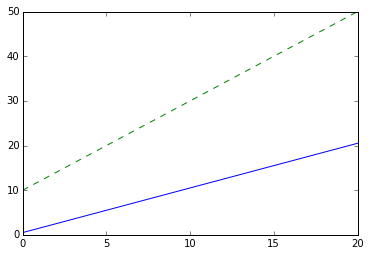

In [8]:
x=np.linspace(0,20)
plt.plot(x, 0.5+x)
plt.plot(x, 10+2*x, '--')

plt.show()

In [9]:
df=pd.read_csv('../data/fromtext/transcount.csv')

In [10]:
df.head()

,trans_count,year
0,2600000000,2011
1,4310000000,2014
2,1000000000,2010
3,5000000000,2012
4,1200000000,2012


In [17]:
grouped=df.groupby('year')
df_g=grouped.aggregate(np.mean)
display(df_g.head())

,trans_count
year,
1971,2300.000000
1972,3500.000000
1974,4533.333333
1975,3510.000000
1976,7500.000000


In [18]:
years=df_g.index
counts=df_g.trans_count

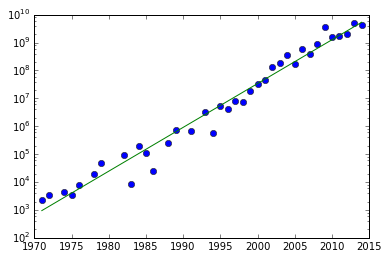

In [20]:
poly=np.polyfit(years, np.log(counts), deg=1)
plt.semilogy(years, counts, 'o')
plt.semilogy(years, np.exp(np.polyval(poly, years)))
plt.show()

In [22]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=20, c=u'b', marker=u'o', cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, hold=None, **kwargs)
    Make a scatter plot of x vs y, where x and y are sequence like objects
    of the same lengths.
    
    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data
    
    s : scalar or array_like, shape (n, ), optional, default: 20
        size in points^2.
    
    c : color or sequence of color, optional, default : 'b'
        `c` can be a single color format string, or a sequence of color
        specifications of length `N`, or a sequence of `N` numbers to be
        mapped to colors using the `cmap` and `norm` specified via kwargs
        (see below). Note that `c` should not be a single numeric RGB or
        RGBA sequence because that is indistinguishable from an array of
        values to be colormapped.  `c` can be a 2-D array in which the
        rows

In [30]:
df_cpu=pd.read_csv('../data/fromtext/transcount.csv')
df_gpu=pd.read_csv('../data/fromtext/gpu_transcount.csv')

In [31]:
display(df_cpu.head())
print df_cpu.shape
print
display(df_gpu.head())

,trans_count,year
0,2600000000,2011
1,4310000000,2014
2,1000000000,2010
3,5000000000,2012
4,1200000000,2012


(81, 2)



,gpu_trans_count,year
0,3500000,1997
1,8000000,1999
2,15000000,1999
3,17500000,1999
4,20000000,2000


In [32]:
temp=df_cpu.groupby('year')
print type(temp)
df_cpu=temp.aggregate(np.mean)
display(df_cpu.head())
print df_cpu.shape

<class 'pandas.core.groupby.DataFrameGroupBy'>


,trans_count
year,
1971,2300.000000
1972,3500.000000
1974,4533.333333
1975,3510.000000
1976,7500.000000


(37, 1)


In [33]:
temp=df_gpu.groupby('year')
print type(temp)
df_gpu=temp.aggregate(np.mean)
display(df_gpu.head())

<class 'pandas.core.groupby.DataFrameGroupBy'>


,gpu_trans_count
year,
1997,3500000
1999,13500000
2000,25000000
2001,58500000
2002,85000000


In [36]:
df=pd.merge(df_cpu, df_gpu, how='outer', left_index=True, right_index=True)
df=df.replace(np.nan, 0)
print df.shape

(37, 2)


In [38]:
display(df.head())

,trans_count,gpu_trans_count
year,,
1971,2300.000000,0
1972,3500.000000,0
1974,4533.333333,0
1975,3510.000000,0
1976,7500.000000,0


1997
15.9135284852


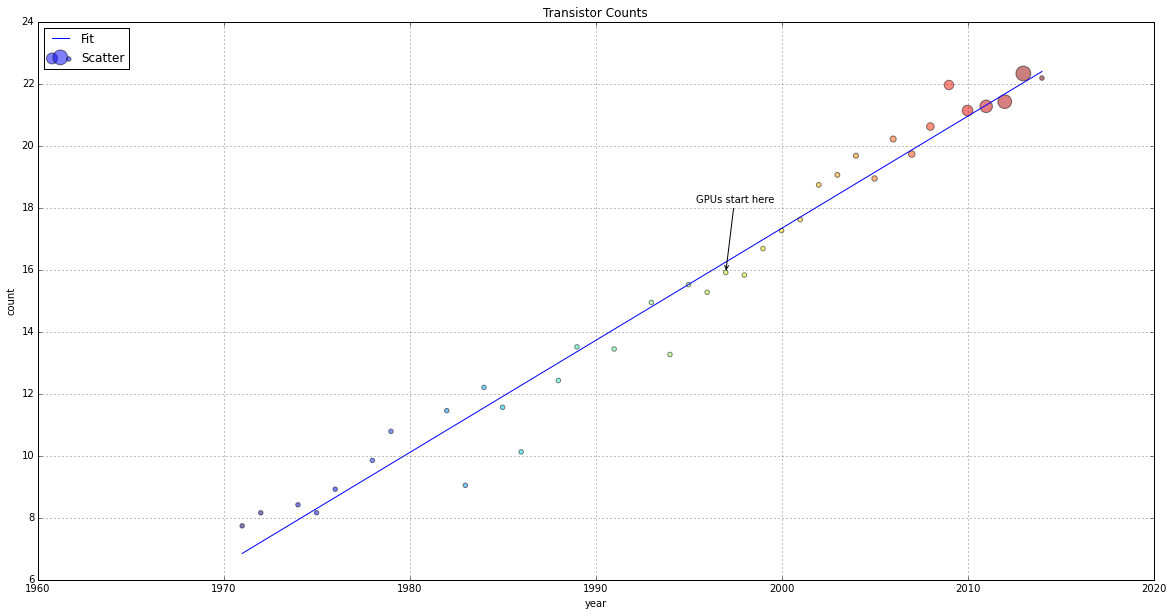

In [66]:
years=df.index
cpu_counts=df.trans_count
gpu_counts=df.gpu_trans_count

plt.figure(figsize=(20,10))

gpu_start=df_gpu.index.min()
print gpu_start
y_ann=np.log(df.trans_count[gpu_start])
print y_ann
ann_str='GPUs start here'
plt.annotate(ann_str, xy=(gpu_start, y_ann), arrowprops=dict(arrowstyle="->"), xytext=(-30,70), textcoords='offset points')


plt.plot(years, np.polyval(poly, years), label='Fit')
plt.scatter(years, np.log(cpu_counts), c=200*years, s=20+200*gpu_counts/gpu_counts.max(), alpha=0.5, label="Scatter")
plt.legend(loc='upper left')
plt.grid()
plt.xlabel('year')
plt.ylabel('count')
plt.title('Transistor Counts')


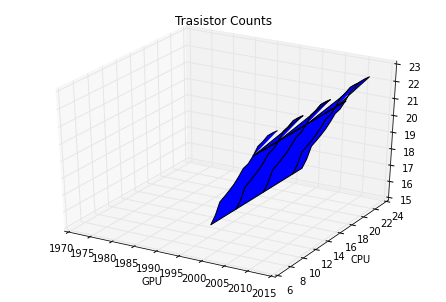

In [76]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

fig=plt.figure()
ax=Axes3D(fig)

X=df.index
Y=np.log(df.trans_count)

X,Y=np.meshgrid(X,Y)

Z=np.log(df.gpu_trans_count)

ax.plot_surface(X,Y,Z)

ax.set_xlabel('Year')
ax.set_ylabel('CPU')
ax.set_xlabel('GPU')

ax.set_title('Trasistor Counts')


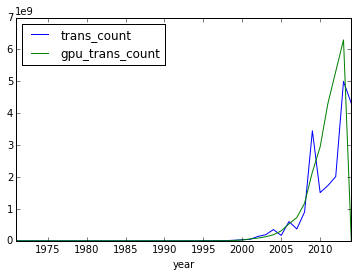

In [77]:
df.plot()

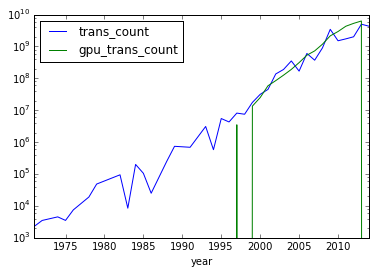

In [78]:
df.plot(logy=True)

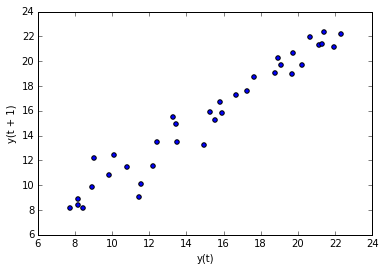

In [79]:
from pandas.tools.plotting import lag_plot

lag_plot(np.log(df.trans_count))

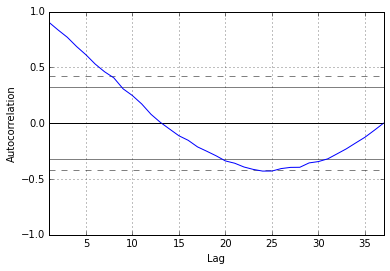

In [80]:
from pandas.tools.plotting import autocorrelation_plot

autocorrelation_plot(np.log(df.trans_count))